In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In [2]:
df_hr = pd.read_csv('HR_comma_sep.csv')

df_hr.rename(columns={'sales': 'department'}, inplace=True)

df_hr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


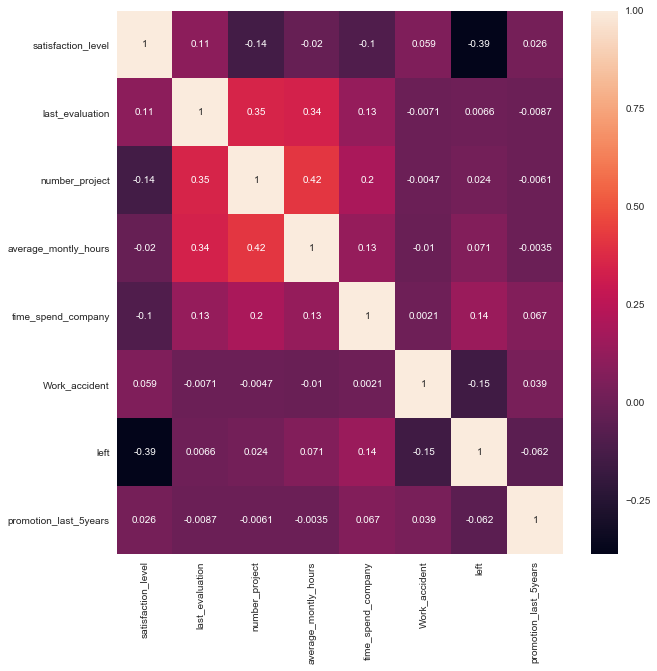

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df_hr.corr(), annot=True)

Se ve una correlación entre el nivel de satisfacción y la permanencia o no en la empresa


# Ahora veamos la matriz de correlación solo para aquellos que se fueron


In [6]:
df_hr_left = df_hr[df_hr['left'] == 1] 
df_hr.drop('left', axis=1)
#df_hr_left = df_hr_left.drop(columns=['left']) #quito la col left, y trabajo con el df
df_hr_not_left = df_hr[df_hr['left'] == 0] 

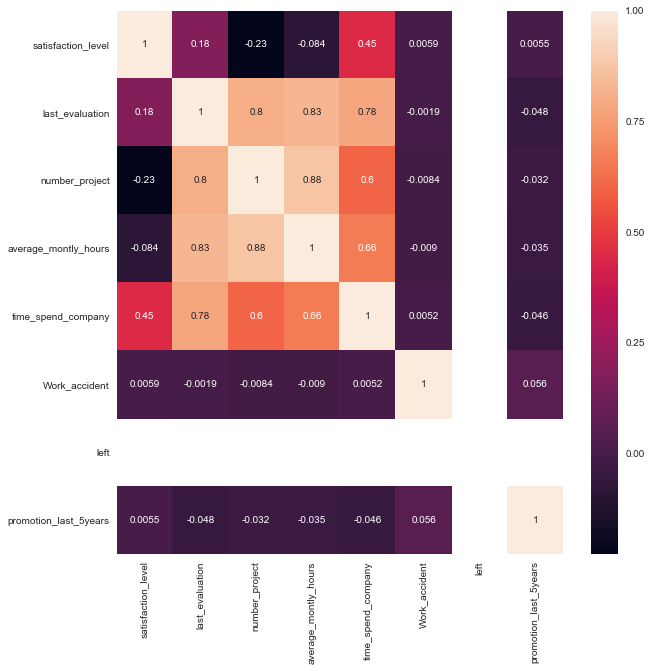

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df_hr_left.corr(), annot=True)

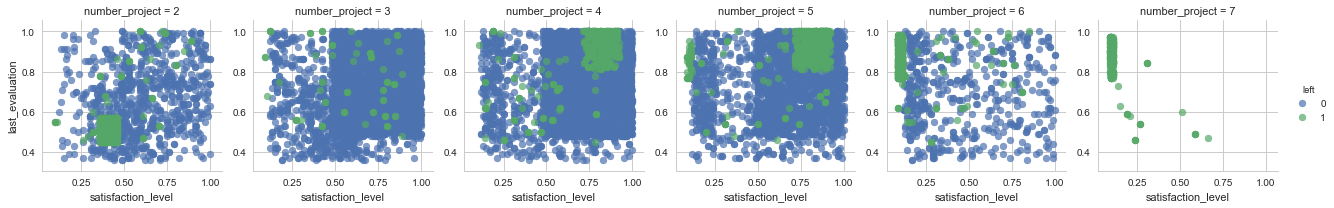

In [8]:
g = sns.FacetGrid(df_hr, col="number_project", hue="left")
g.map(plt.scatter, "satisfaction_level", "last_evaluation", alpha=.7)
g.add_legend();

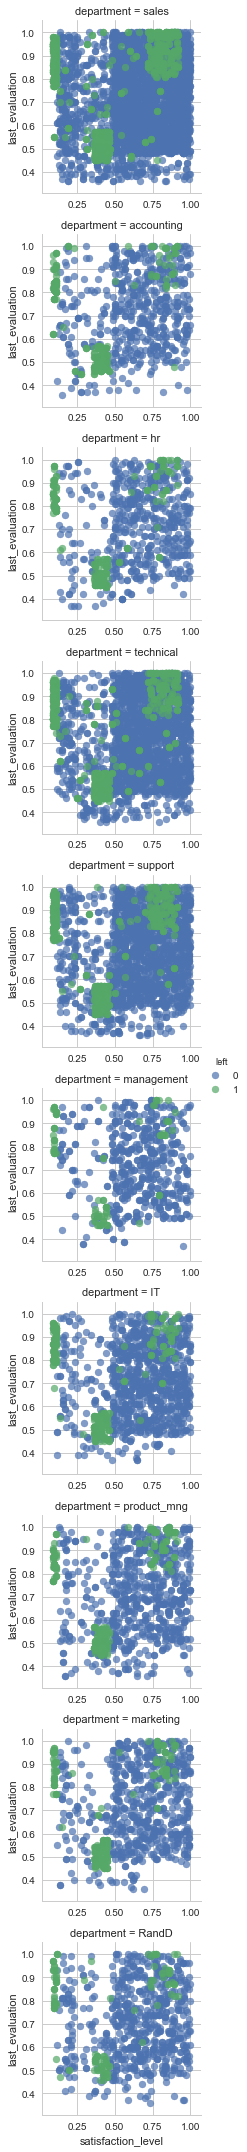

In [9]:
g = sns.FacetGrid(df_hr, row="department", hue="left")
g.map(plt.scatter, "satisfaction_level", "last_evaluation", alpha=.7)
g.add_legend();

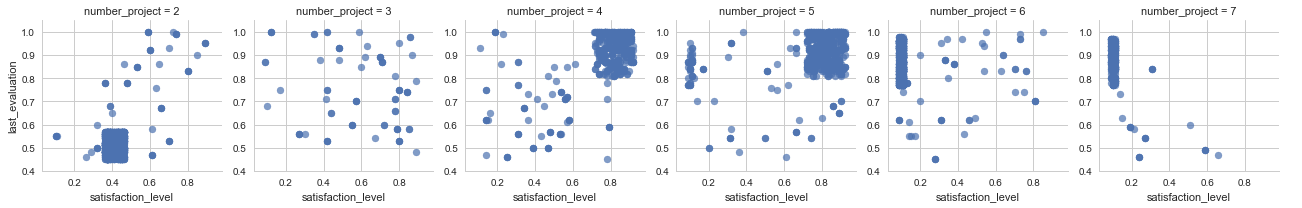

In [10]:
g = sns.FacetGrid(df_hr_left, col="number_project")
g.map(plt.scatter, "satisfaction_level", "last_evaluation", alpha=.7)
g.add_legend();

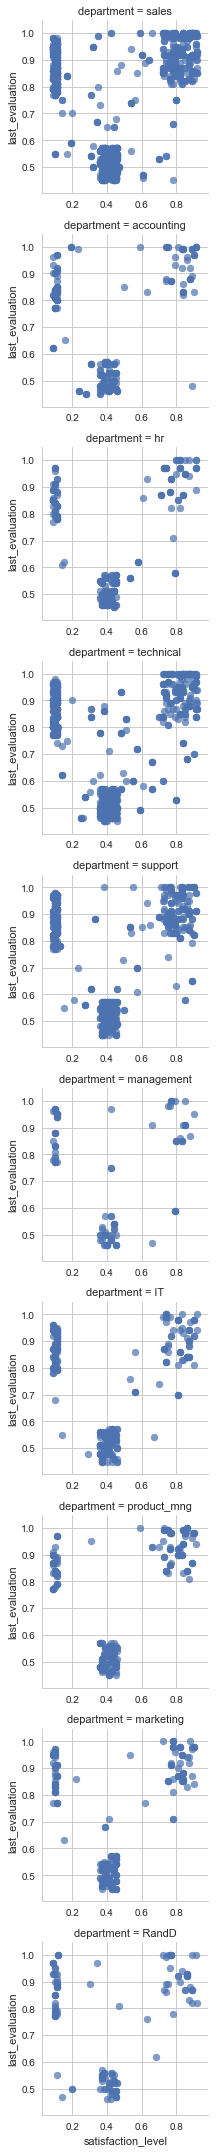

In [11]:
g = sns.FacetGrid(df_hr_left, row="department")
g.map(plt.scatter, "satisfaction_level", "last_evaluation", alpha=.7)
g.add_legend();

In [12]:
#g = sns.FacetGrid(df_hr, row="department", size=1.7, aspect=4,)
#g.map(sns.distplot, "average_montly_hours", hist=False, rug=True);

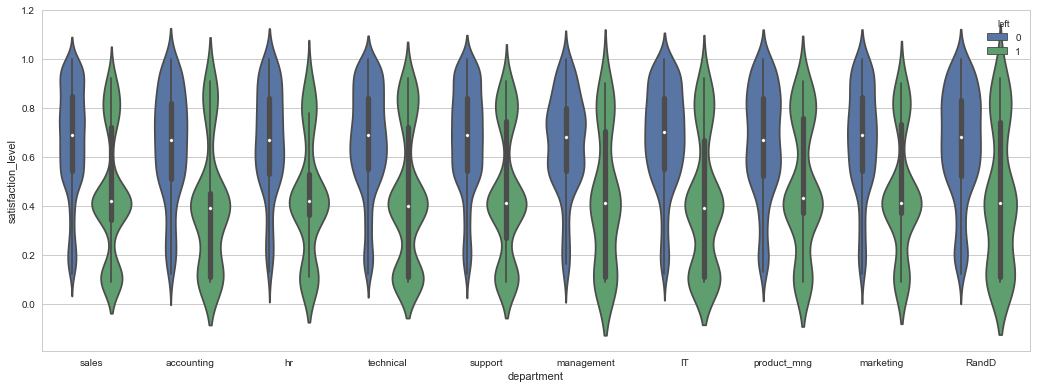

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(17.7, 6.27)
ax = sns.violinplot(x="department", y="satisfaction_level", hue="left",data=df_hr)

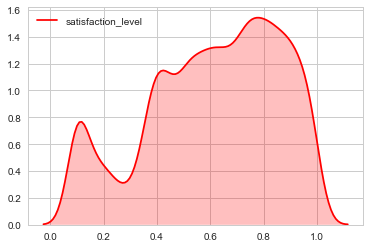

In [14]:
ax = sns.kdeplot(df_hr.satisfaction_level, shade=True, color="r")


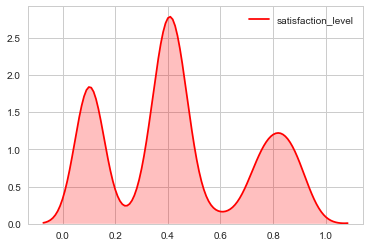

In [15]:
ax = sns.kdeplot(df_hr_left.satisfaction_level, shade=True, color="r" )


de la gente que se fue, hay 3 olas que analizar, pero principalmente debemos ver la que tiene buen nivel de satisfaccion


In [16]:
df_left_high_satisf = df_hr.query('satisfaction_level > .6')

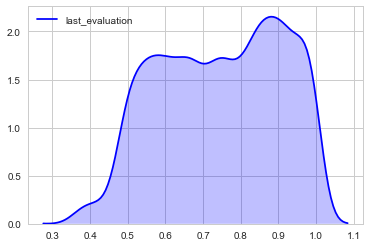

In [17]:
ax = sns.kdeplot(df_left_high_satisf.last_evaluation, shade=True, color="b" )

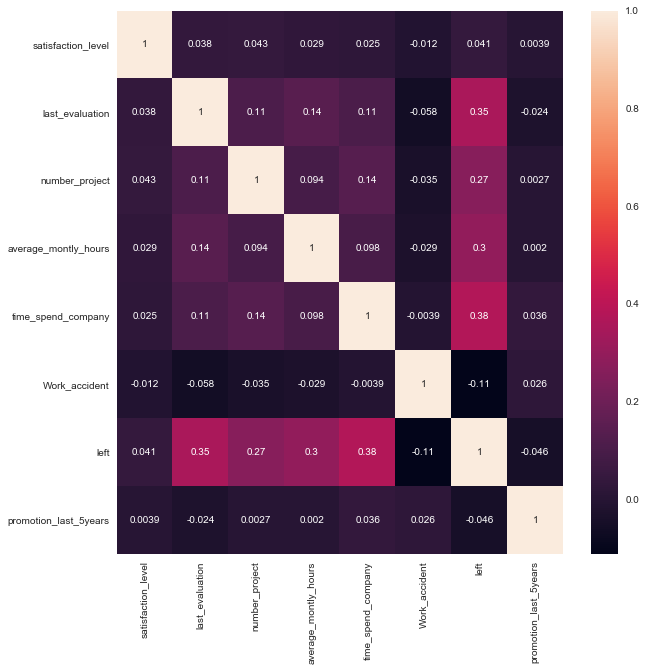

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df_left_high_satisf.corr(), annot=True)

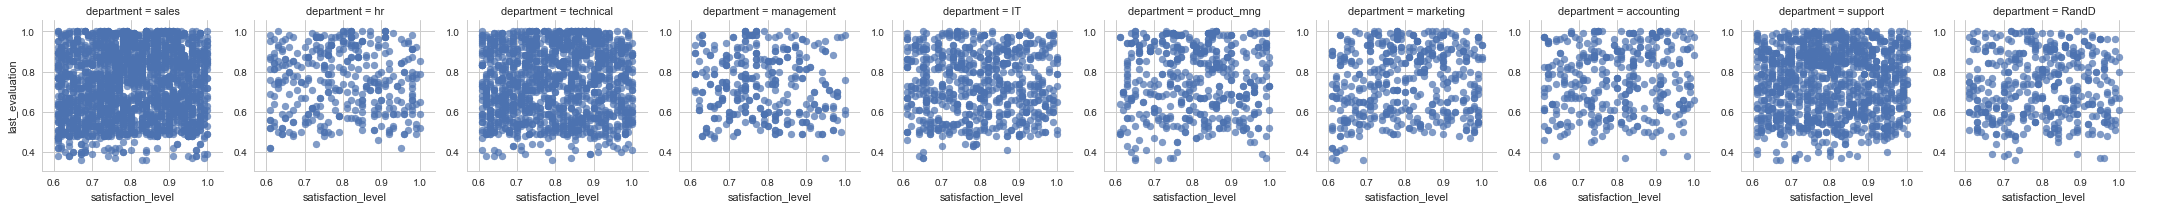

In [19]:
g = sns.FacetGrid(df_left_high_satisf, col="department")
g.map(plt.scatter, "satisfaction_level", "last_evaluation", alpha=.7)
g.add_legend();

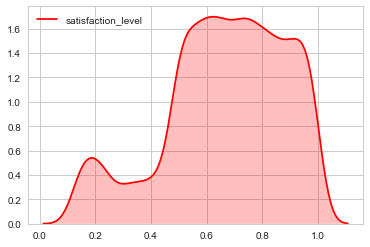

In [20]:
ax = sns.kdeplot(df_hr_not_left.satisfaction_level, shade=True, color="r" )

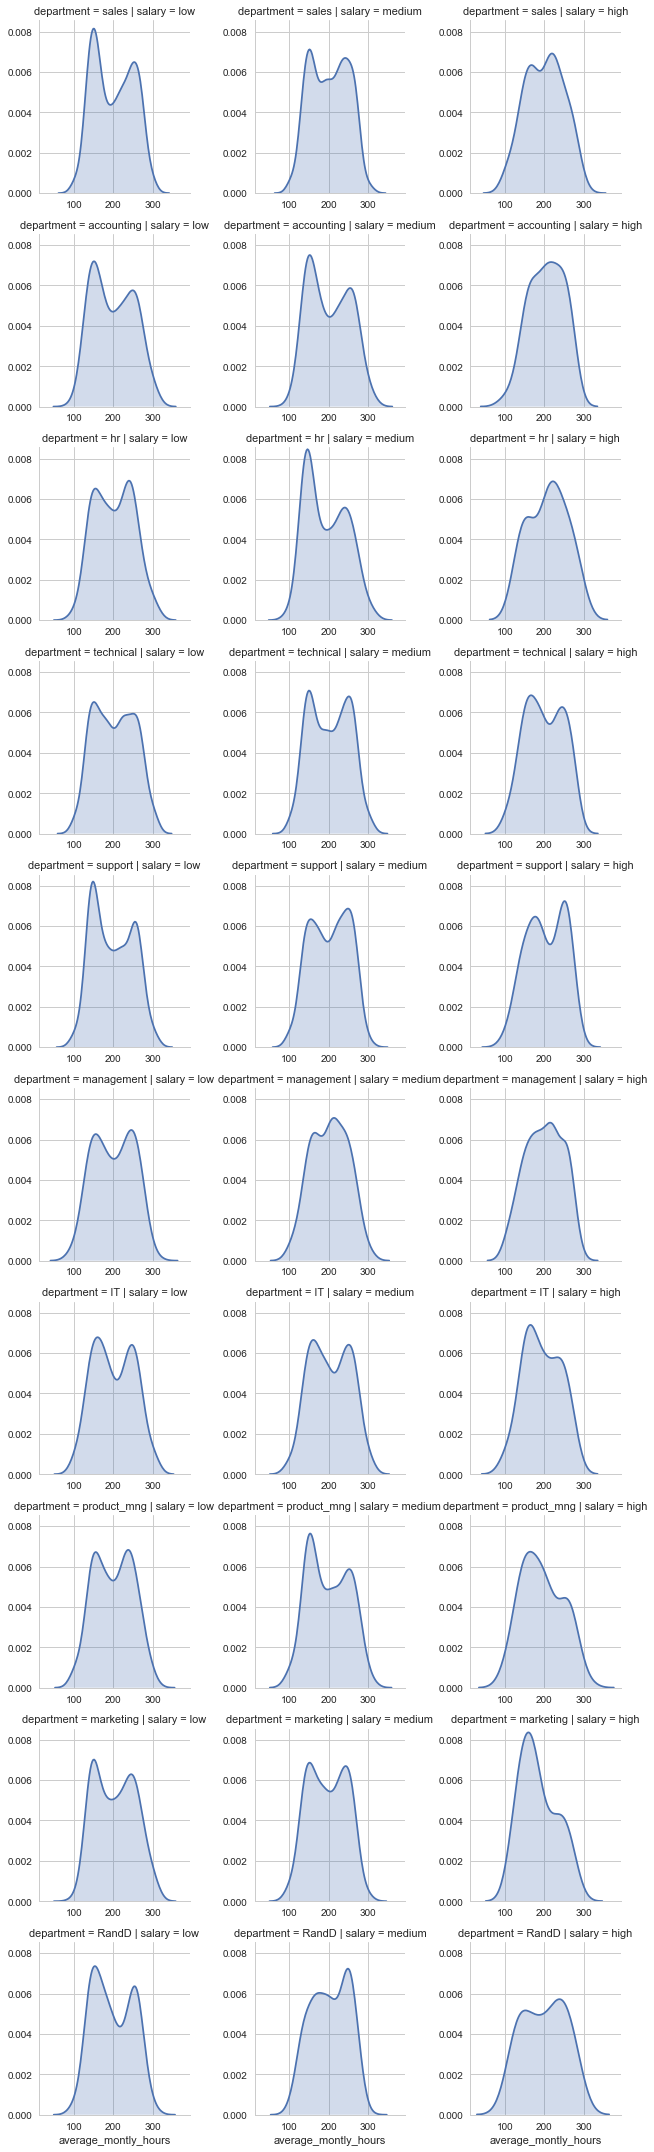

In [21]:
g = sns.FacetGrid(df_hr, col="salary",row="department")
g.map(sns.kdeplot, "average_montly_hours",shade=True)

Lógico, la gente que se queda está satisfecha en general
